In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import constants as c

In [2]:
def read_csv_file(api: str, method: str, n_requests: str, is_secure: bool)-> pd.DataFrame:
   file_path = get_file_path(api, method, n_requests, is_secure)
   return pd.read_csv(file_path)

def get_file_path(api: str, method: str, n_requests: int, secure:bool)-> str:
   if api == c.API_GRPC:
      data_dir = c.GRPC_DATA_DIRECTORY
   elif api == c.API_REST:
      data_dir = c.REST_DATA_DIRECTORY
   else:
      raise ValueError()
   
   file_name = "secure" if secure else "insecure"
   file_name += "_" + method + "_" + str(n_requests)
   return data_dir + file_name + ".csv"

In [3]:
def make_bar_chart(api: str, method: str, metric: str):
   # Plotting as a bar chart
   bins = ["100", "1000", "10000"]
   if metric == c.AVERAGE_RESPONSE_TIME_MS_KEY:
      data = get_data_response_time(api, method)
   elif metric == c.REQUEST_PER_SEC_KEY:
      data = get_data_request_per_sec(api, method)
   else:
      raise ValueError()
   
   ax = plt.gca()
   ax.spines['top'].set_visible(False)
   ax.spines['left'].set_visible(False)
   ax.spines['right'].set_visible(False)
   
   plt.bar(bins, data, color='blue', alpha=0.7)

def get_data_response_time(api: str, method: str, is_secure: bool):
   response_times = []
   for n_req in c.N_REQUESTS_LIST:
      df = read_csv_file(api, method, n_req, is_secure)
      value = df.mean()[c.AVERAGE_RESPONSE_TIME_MS_KEY]
      response_times.append(value)
   return response_times

def get_data_request_per_sec(api: str, method: str, is_secure: bool):
   request_per_sec_data = []
   for n_req in c.N_REQUESTS_LIST:
      df = read_csv_file(api, method, n_req, is_secure)
      value = df.mean()[c.REQUEST_PER_SEC_KEY]
      request_per_sec_data.append(value)
   return request_per_sec_data


In [ ]:
def make_combined_bar_chart(method: str, metric: str, is_secure: bool):
   # Bins and data
   bins = ["100", "1000", "10000"]
   if metric == c.AVERAGE_RESPONSE_TIME_MS_KEY:
      grpc_data = get_data_response_time(c.API_GRPC, method, is_secure) 
      rest_data = get_data_response_time(c.API_REST, method, is_secure) 
   elif metric == c.REQUEST_PER_SEC_KEY:
      grpc_data = get_data_request_per_sec(c.API_GRPC, method, is_secure)
      rest_data = get_data_request_per_sec(c.API_REST, method, is_secure)
   else:
      raise ValueError()
   
   # Bar width and positions
   bar_width = 0.35
   x = range(len(bins))
   grpc_positions = [pos - bar_width / 2 for pos in x]
   rest_positions = [pos + bar_width / 2 for pos in x]

   # Plotting
   plt.bar(grpc_positions, grpc_data, width=bar_width, label=f"{c.API_GRPC}", color='blue', alpha=0.7)
   plt.bar(rest_positions, rest_data, width=bar_width, label=f"{c.API_REST}", color='orange', alpha=0.7)

   ax = plt.gca()
   ax.spines['top'].set_visible(False)
   ax.spines['left'].set_visible(False)
   ax.spines['right'].set_visible(False)

   # Customizing the chart
   plt.xticks(x, bins)
   plt.xlabel("Total # requests")
   plt.ylabel(metric)
   plt.title(f"Comparison of {metric} for {method}")
   
   plt.legend(bbox_to_anchor=(0.85, 1.0))
   image_path = "./data/" 
   img_file_name = "secure" if is_secure else "insecure"
   img_file_name += "_" + method + "_" + metric
   image_path += img_file_name
   plt.savefig(image_path)
   plt.show()

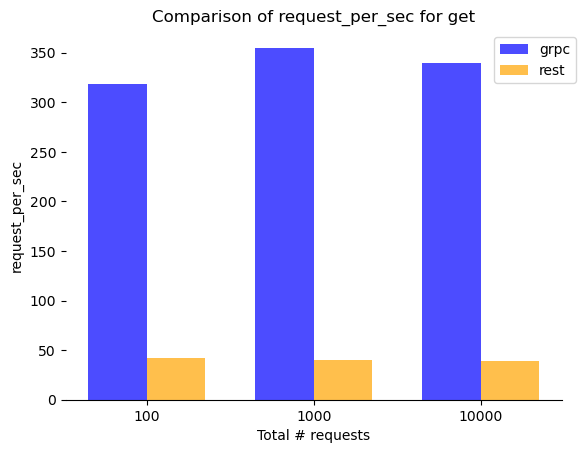

In [ ]:
make_combined_bar_chart(c.METHOD_GET, c.REQUEST_PER_SEC_KEY, True)

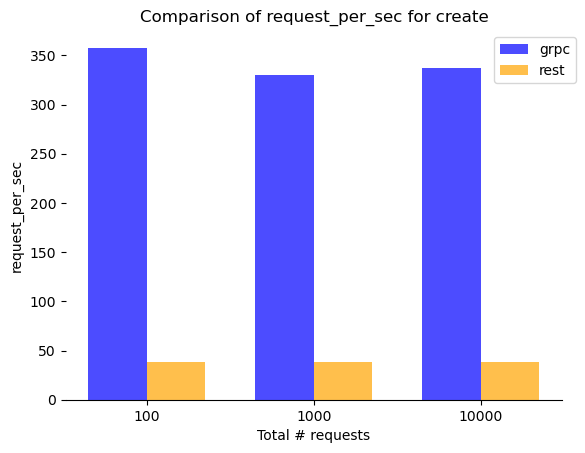

In [7]:
make_combined_bar_chart(c.METHOD_CREATE, c.REQUEST_PER_SEC_KEY, True)


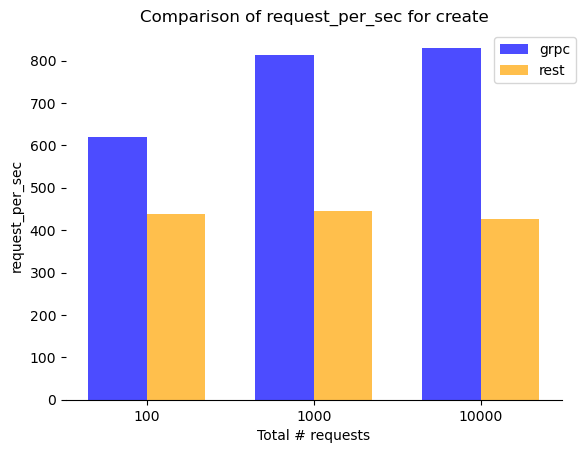

In [13]:
make_combined_bar_chart(c.METHOD_CREATE, c.REQUEST_PER_SEC_KEY, False)


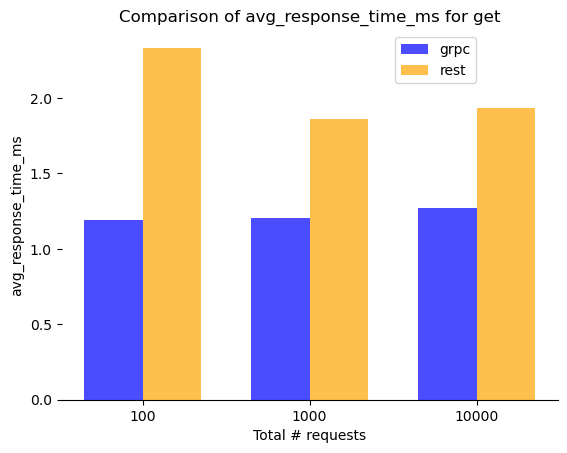

In [12]:
make_combined_bar_chart(c.METHOD_GET, c.AVERAGE_RESPONSE_TIME_MS_KEY, False)
